<a href="https://colab.research.google.com/github/Arpitsinghvampire/computer_vision/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#first we try to import the dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score



In [13]:
#now we try to load the dataset


(x_train,y_train),(x_test,y_test)=mnist.load_data()

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


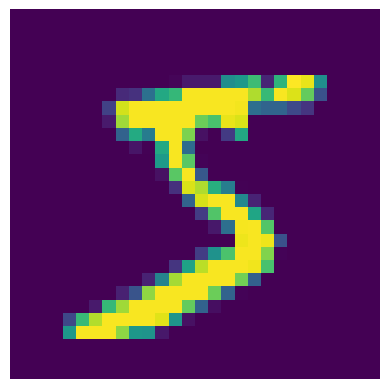

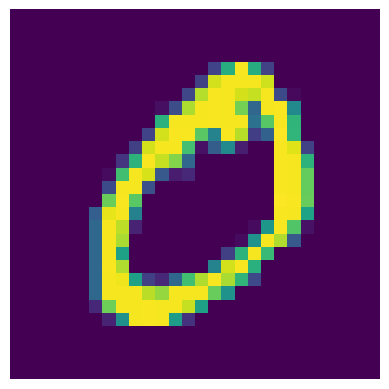

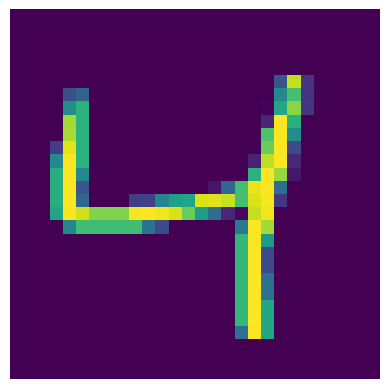

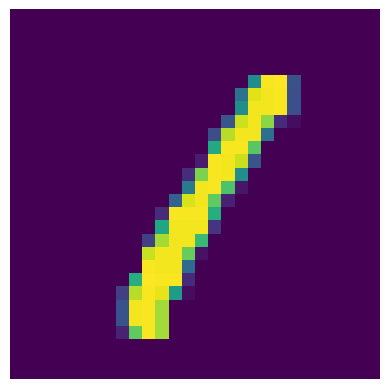

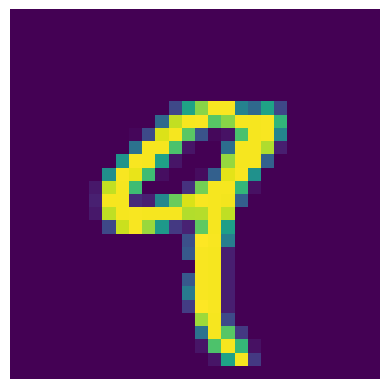

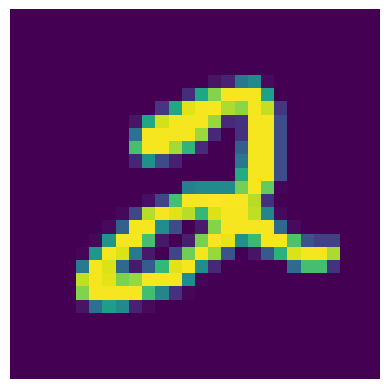

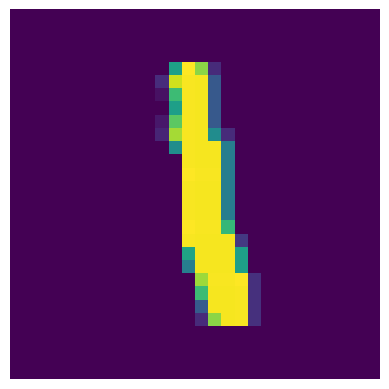

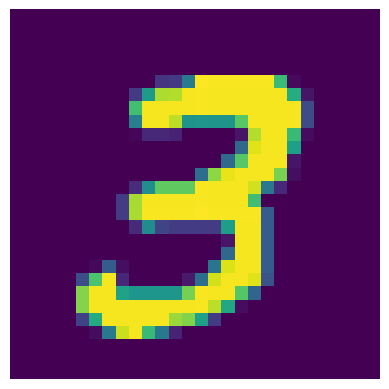

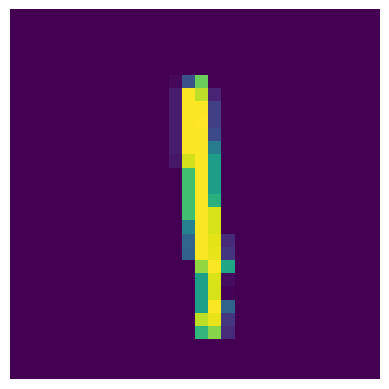

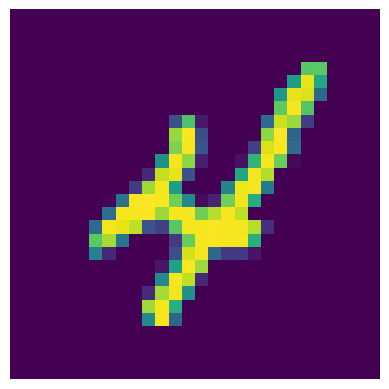

In [14]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.plot()
  plt.show()

In [21]:
latent_dim=64
class Autoencoder(Model):
  def __init__(self,latent_dim):
    super(Autoencoder,self).__init__()
    self.latent_dim=latent_dim
    self.encoder=tf.keras.Sequential(
        [
            layers.Flatten(),
            layers.Dense(latent_dim*4,activation='relu'),
            layers.Dense(latent_dim*3,activation='relu'),
            layers.Dense(latent_dim*2,activation='relu'),
            layers.Dense(latent_dim,activation='relu')
        ]
    )

    self.decoder=tf.keras.Sequential([
        layers.Dense(latent_dim*2,activation='relu'),
        layers.Dense(latent_dim*3,activation='relu'),
        layers.Dense(latent_dim*4,activation='relu'),
        layers.Dense(784,activation='relu'),
        layers.Reshape((28,28))
    ])

  def call(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded


autoencoder=Autoencoder(latent_dim)

In [22]:
#lets plot the model

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [26]:
#now after defining the model , we would now compile the model
from tensorflow.keras import losses

autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError(),metrics=['accuracy','precision'],run_eagerly=True)


In [27]:
#now lets fit the data into the model

autoencoder.fit(x_train,x_train,epochs=10,shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 140s 75ms/step - loss: 2106.6086
Epoch 2/10
1875/1875 [==============================] - 138s 74ms/step - loss: 1609.3462
Epoch 3/10
1875/1875 [==============================] - 144s 77ms/step - loss: 1482.0306
Epoch 4/10
1875/1875 [==============================] - 137s 73ms/step - loss: 1430.7880
Epoch 5/10
1875/1875 [==============================] - 138s 74ms/step - loss: 1392.5040
Epoch 6/10
1875/1875 [==============================] - 137s 73ms/step - loss: 1365.6185
Epoch 7/10
1875/1875 [==============================] - 138s 73ms/step - loss: 1329.5997
Epoch 8/10
1875/1875 [==============================] - 138s 73ms/step - loss: 1312.4758
Epoch 9/10
1875/1875 [==============================] - 137s 73ms/step - loss: 1298.6293
Epoch 10/10
1875/1875 [==============================] - 138s 74ms/step - loss: 1287.4305


In [29]:
print(autoencoder.encoder.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (32, 784)                 0         
                                                                 
 dense_23 (Dense)            (32, 256)                 200960    
                                                                 
 dense_24 (Dense)            (32, 192)                 49344     
                                                                 
 dense_25 (Dense)            (32, 128)                 24704     
                                                                 
 dense_26 (Dense)            (32, 64)                  8256      
                                                                 
Total params: 283264 (1.08 MB)
Trainable params: 283264 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [30]:
print(autoencoder.decoder.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (32, 128)                 8320      
                                                                 
 dense_28 (Dense)            (32, 192)                 24768     
                                                                 
 dense_29 (Dense)            (32, 256)                 49408     
                                                                 
 dense_30 (Dense)            (32, 784)                 201488    
                                                                 
 reshape_4 (Reshape)         (32, 28, 28)              0         
                                                                 
Total params: 283984 (1.08 MB)
Trainable params: 283984 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


1/1 [==============================] - 0s 31ms/step


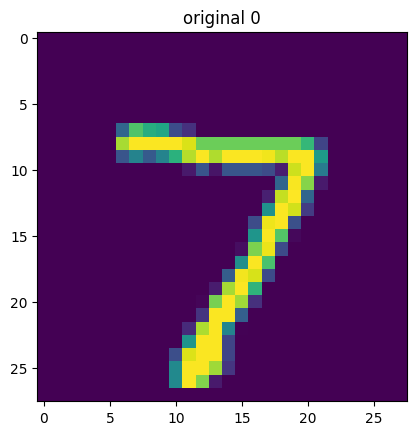

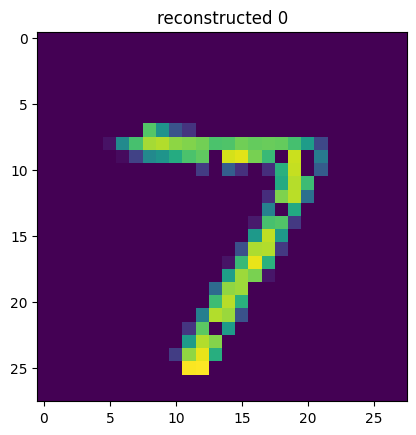

1/1 [==============================] - 0s 28ms/step


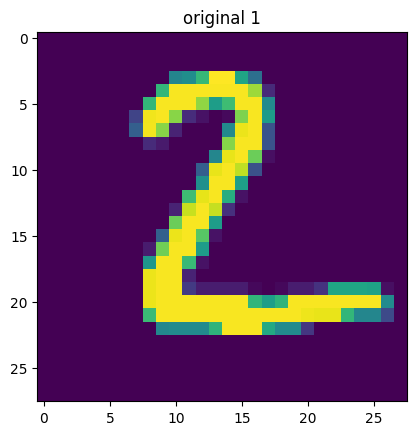

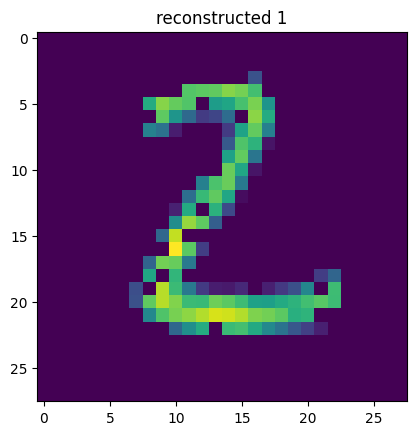

1/1 [==============================] - 0s 28ms/step


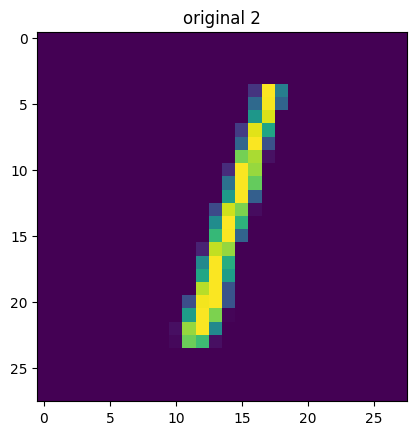

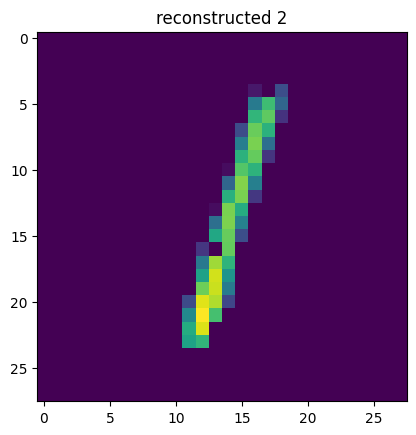

1/1 [==============================] - 0s 30ms/step


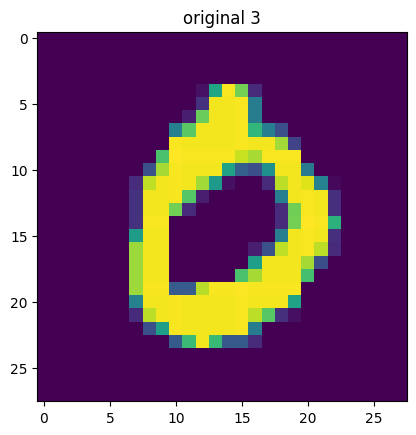

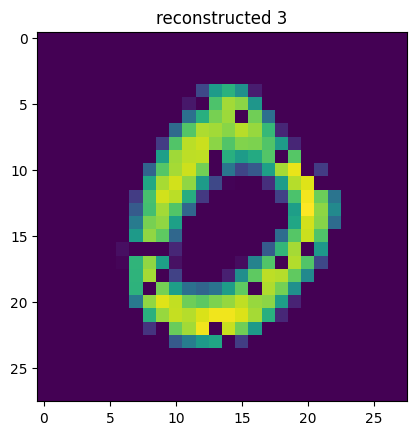

1/1 [==============================] - 0s 31ms/step


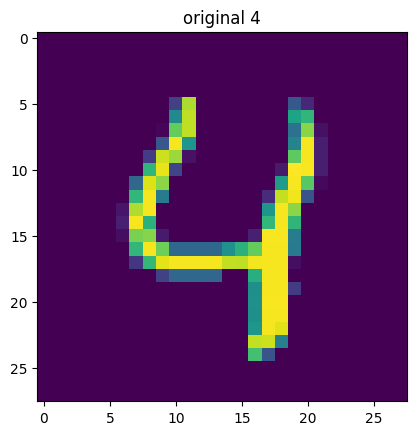

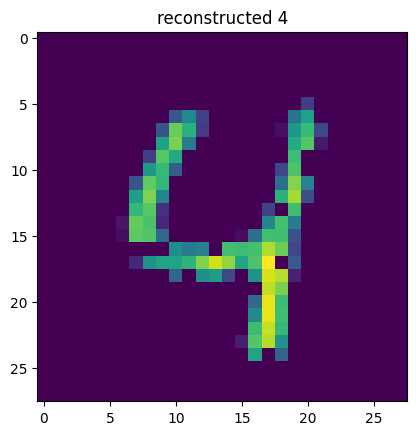

In [39]:
#ok so now we have the model ready we would like to see

#how the data is reconstructed
#so here we would take the images
for i in range(5):

  flattened_image = x_test[i].reshape(1, 28 * 28)  # Reshape to (1, 784)

  #encoded_image=autoencoder.encoder(flattened_image).numpy()
  #decoded_image=autoencoder.decoder(encoded_image).numpy().reshape(28,28)
  #now we plot the final image
  decoded_image=autoencoder.predict(flattened_image).reshape(28,28)

  plt.imshow(x_test[i])
  plt.title(f'original {i}')
  plt.plot()
  plt.show()


  plt.imshow(decoded_image)
  plt.title(f'reconstructed {i}')
  plt.plot()
  plt.show()